This notebook tests all the visulizations for the MTA turnstile data

# Setup

In [ ]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [ ]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

In [ ]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.precision',3)

# import data

In [ ]:
df = pd.DataFrame.from_csv('clean_data.csv', parse_dates=['parsed_datetime','parsed_date']) 

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.parsed_datetime.describe()

In [ ]:
df['day_of_week'] = df.parsed_date.apply(lambda x: x.isoweekday())

# Plots

In [ ]:
# create dataset with entries+exits, entries, exits
station = df.groupby(['station','date'])['entries','exits'].sum().groupby(['station']).mean()\
.rename(columns={'entries': 'daily_entries', 'exits': 'daily_exits'})

In [22]:
station['daily_ridership'] = (station.daily_entries + station.daily_exits)/2
station['exits_rank'] = station.daily_exits.rank(ascending = False)
station['ridership_rank'] = station.daily_ridership.rank(ascending = False)
station = station[(station.ridership_rank <=9) | (station.exits_rank <=9)].sort_values(['ridership_rank','exits_rank'])

In [23]:
station_list = station.index.tolist()
day_dict = {1: 'Mon', 2: "Tue", 3:'Wed', 4:'Thu', 5:'Fri',6:'Sat', 7:'Sun'}


In [24]:
# define brunch time as from 8AM - noon
brunch = df[(df.time <= '12:00:00') & (df.time > '08:00:00')].groupby(['station','date','day_of_week']).exits.sum()\
.groupby(['station','day_of_week']).mean().reset_index().rename(columns={'exits': 'average_brunch_exits'})

bruch = brunch[brunch.station.isin(station_list)]
brunch = brunch.replace({'day_of_week': day_dict})

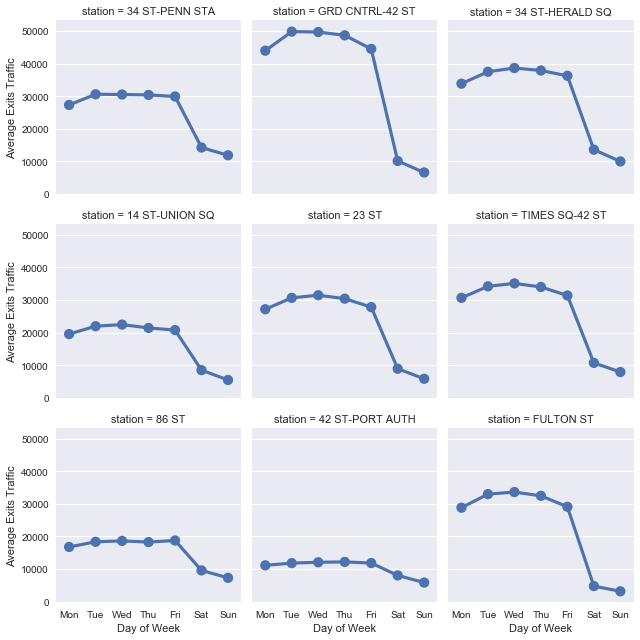

In [25]:
g = sns.FacetGrid(data = brunch, col='station',col_order =station.index, sharey= True, sharex=True, col_wrap = 3)
g.map(sns.pointplot, 'day_of_week','average_brunch_exits', \
      order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
g.set_xlabels('Day of Week')
g.set_ylabels('Average Exits Traffic')

#plt.subplots_adjust(top=0.92)
#g.fig.suptitle('Brunch Time (8AM to Noon) Average Exits Traffic By Station')

g.savefig('Brunch_Exits.png')



In [27]:
# define dinner time as from 4pm to 8pm 

dinner = df[(df.time <= '20:00:00') & (df.time > '16:00:00')].groupby(['station','date','day_of_week']).exits.sum()\
.groupby(['station','day_of_week']).mean().reset_index().rename(columns={'exits': 'average_brunch_exits'})

dinner = dinner[dinner.station.isin(station_list)]

dinner = dinner.replace({'day_of_week': day_dict})

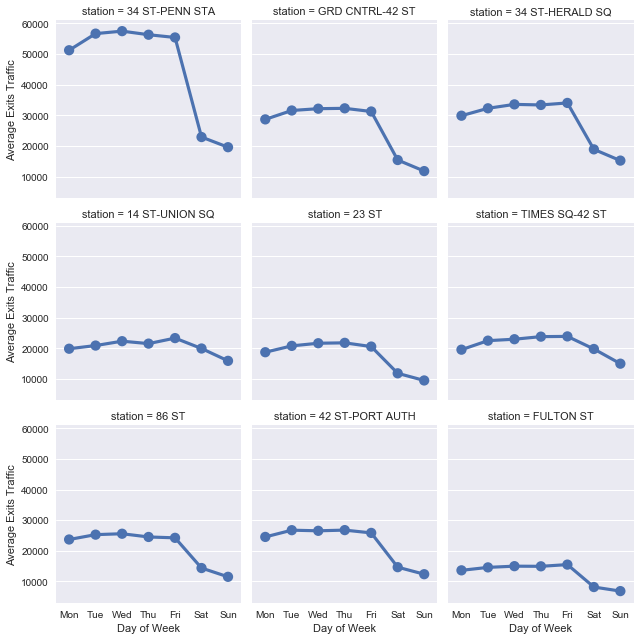

In [28]:
gd = sns.FacetGrid(data = dinner, col='station',col_order =station.index, sharey= True, sharex=True, col_wrap = 3)
gd.map(sns.pointplot, 'day_of_week','average_brunch_exits', \
      order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
gd.set_xlabels('Day of Week')
gd.set_ylabels('Average Exits Traffic')

#plt.subplots_adjust(top=0.92)
#gd.fig.suptitle('Dinner Time (4pm-8pm) Average Exits Traffic By Station')

gd.savefig('Dinner_Exits.png')

